In [1]:
import flimview.flim as flim
import flimview.io_utils as io
import flimview.plot_utils as pu
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
sdtfile = '/home/matias/Research/GSK/Psoriasis/test_dataset/FLIM_D/60_D_760nm_c11.sdt'

In [3]:
data,header = io.read_sdt_file(sdtfile)

In [4]:
c11 = flim.FlimCube(data, header)

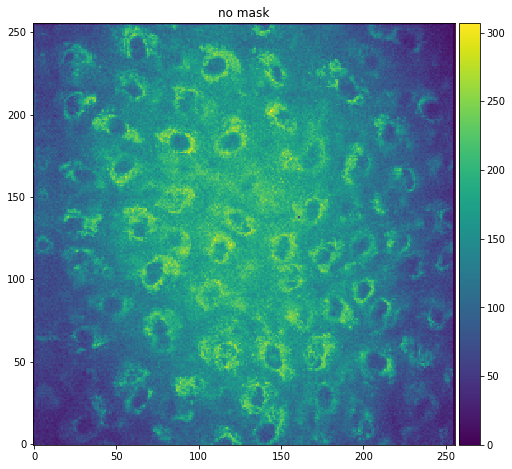

In [5]:
pu.plot2d(c11.intensity, title='no mask')

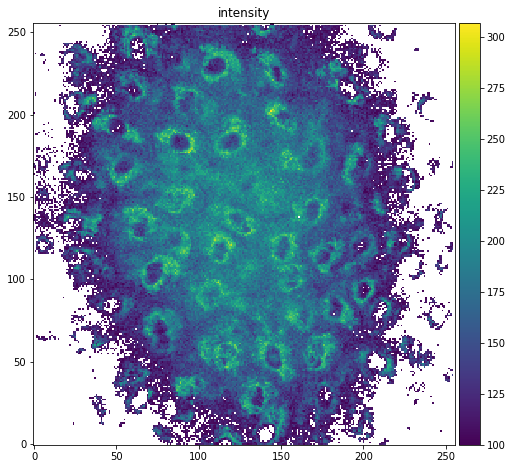

In [6]:
c11.mask_intensity(100)
pu.plot2d(c11.intensity, title='intensity')

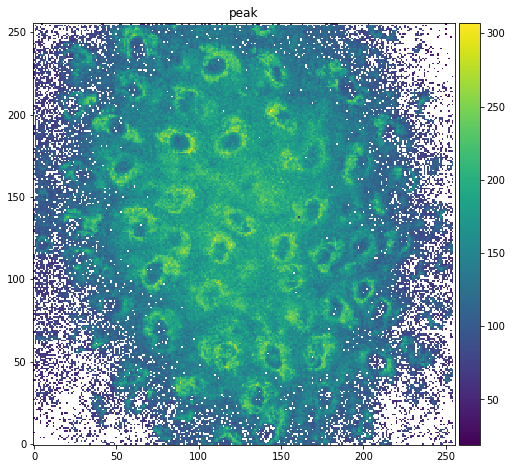

In [7]:
c11.mask_peak(5)
pu.plot2d(c11.intensity, title='peak')

In [8]:
xc, yc = 128, 128
n = 256
r = 130
y,x = np.ogrid[-xc:n-xc, -yc:n-yc]
disk = x*x + y*y > r*r
array = np.ones((n, n))
array[disk] = 0

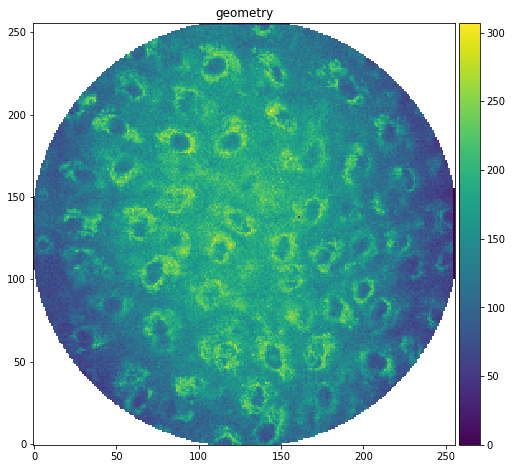

In [9]:
c11.mask_peak(0, mask=disk)
pu.plot2d(c11.intensity, title='geometry')

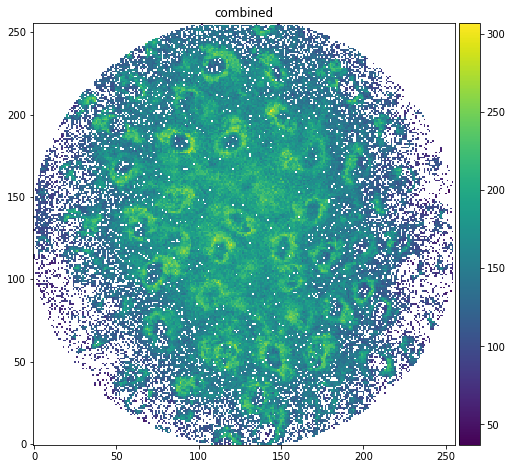

In [10]:
#Combined
c11.mask_peak(6)
mask5 = c11.mask
c11.mask_peak(0, mask=mask5|disk)
pu.plot2d(c11.intensity, title='combined')